### 1. Setup

In [1]:
# Python ≥3.5 diperlukan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 diperlukan
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version hanya ada di Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 diperlukan
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Impor umum
import numpy as np
import os

# untuk membuat output notebook ini stabil di berbagai run
np.random.seed(42)

# Untuk membuat gambar yang bagus
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Tempat menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-06-20 03:04:27.093173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750363467.128803  109226 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750363467.147410  109226 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 03:04:27.284104: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Masalah Vanishing/Exploding Gradients

Saving figure sigmoid_saturation_plot


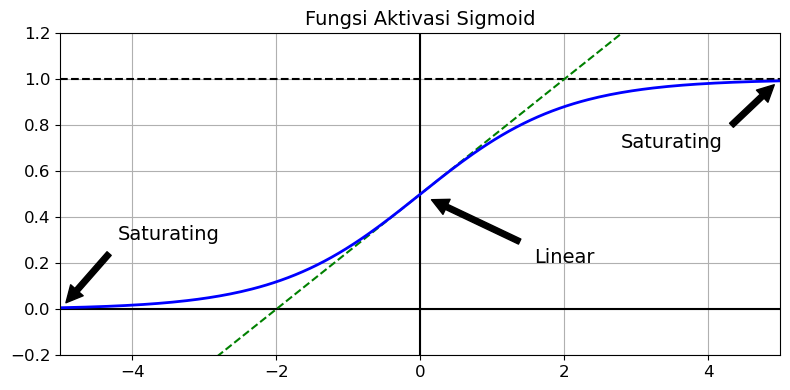

In [2]:
# Fungsi aktivasi sigmoid dan masalah saturasi

def logit(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(8, 4))
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Fungsi Aktivasi Sigmoid", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
save_fig("sigmoid_saturation_plot")
plt.show()

#### Inisialisasi Xavier dan He

In [3]:
# Menampilkan inisialisasi yang tersedia di Keras
print("Inisialisasi Keras yang tersedia:", [name for name in dir(keras.initializers) if not name.startswith("_")])

# Contoh penggunaan inisialisasi he_normal
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# Contoh penggunaan inisialisasi VarianceScaling
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

Inisialisasi Keras yang tersedia: ['Constant', 'GlorotNormal', 'GlorotUniform', 'HeNormal', 'HeUniform', 'Identity', 'IdentityInitializer', 'Initializer', 'LecunNormal', 'LecunUniform', 'Ones', 'Orthogonal', 'OrthogonalInitializer', 'RandomNormal', 'RandomUniform', 'STFT', 'STFTInitializer', 'TruncatedNormal', 'VarianceScaling', 'Zeros', 'constant', 'deserialize', 'get', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'identity', 'lecun_normal', 'lecun_uniform', 'ones', 'orthogonal', 'random_normal', 'random_uniform', 'serialize', 'stft', 'truncated_normal', 'variance_scaling', 'zeros']


<Dense name=dense_1, built=False>

#### Fungsi Aktivasi Non-Saturating

##### Leaky ReLU

Saving figure leaky_relu_plot


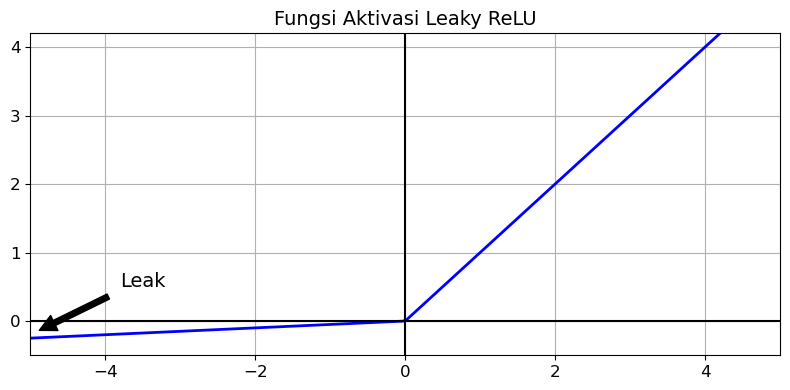

In [4]:
# Definisi fungsi Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

# Plotting Leaky ReLU
plt.figure(figsize=(8, 4))
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Fungsi Aktivasi Leaky ReLU", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
save_fig("leaky_relu_plot")
plt.show()

In [5]:
# Menampilkan fungsi aktivasi yang tersedia di Keras
print("Fungsi aktivasi Keras yang tersedia:", [m for m in dir(keras.activations) if not m.startswith("_")])

Fungsi aktivasi Keras yang tersedia: ['celu', 'deserialize', 'elu', 'exponential', 'gelu', 'get', 'glu', 'hard_shrink', 'hard_sigmoid', 'hard_silu', 'hard_swish', 'hard_tanh', 'leaky_relu', 'linear', 'log_sigmoid', 'log_softmax', 'mish', 'relu', 'relu6', 'selu', 'serialize', 'sigmoid', 'silu', 'soft_shrink', 'softmax', 'softplus', 'softsign', 'sparse_plus', 'sparsemax', 'squareplus', 'swish', 'tanh', 'tanh_shrink', 'threshold']


In [6]:
# Menampilkan layer yang mengandung 'relu' di Keras
print("Layer Keras yang mengandung 'relu':", [m for m in dir(keras.layers) if "relu" in m.lower()])

Layer Keras yang mengandung 'relu': ['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']


In [7]:
# Melatih neural network di Fashion MNIST menggunakan Leaky ReLU
# Memuat dan memproses data Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# Membangun model dengan Leaky ReLU
tf.random.set_seed(42)
np.random.seed(42)

model_leaky_relu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model_leaky_relu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("\nMelatih model dengan Leaky ReLU:")
history_leaky_relu = model_leaky_relu.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1750363474.602056  109226 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
W0000 00:00:1750363475.303594  109317 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/.


Melatih model dengan Leaky ReLU:
Epoch 1/10


I0000 00:00:1750363476.975283  109305 service.cc:148] XLA service 0x7fbe240062c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750363476.975370  109305 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-06-20 03:04:37.028369: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750363477.082735  109305 cuda_dnn.cc:529] Loaded cuDNN version 91000


  38/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0878 - loss: 2.5277

I0000 00:00:1750363478.021681  109305 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.4618 - loss: 1.6772 - val_accuracy: 0.7132 - val_loss: 0.8810
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7287 - loss: 0.8373 - val_accuracy: 0.7696 - val_loss: 0.7098
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7701 - loss: 0.6993 - val_accuracy: 0.7960 - val_loss: 0.6347
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7897 - loss: 0.6323 - val_accuracy: 0.8088 - val_loss: 0.5899
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8018 - loss: 0.5904 - val_accuracy: 0.8194 - val_loss: 0.5590
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8095 - loss: 0.5609 - val_accuracy: 0.8254 - val_loss: 0.5361
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8167 - loss: 0.5387 - val_accuracy: 0.8294 - val_loss: 0.5182
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8223 - loss: 0.5214 - val_acc

In [9]:
# Mencoba PReLU
# Membangun model dengan PReLU
tf.random.set_seed(42)
np.random.seed(42)

model_prelu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model_prelu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("\nMelatih model dengan PReLU:")
history_prelu = model_prelu.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Melatih model dengan PReLU:
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4828 - loss: 1.6880 - val_accuracy: 0.7340 - val_loss: 0.8835
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7385 - loss: 0.8439 - val_accuracy: 0.7774 - val_loss: 0.7048
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7764 - loss: 0.6994 - val_accuracy: 0.7970 - val_loss: 0.6289
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7940 - loss: 0.6306 - val_accuracy: 0.8098 - val_loss: 0.5842
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8061 - loss: 0.5879 - val_accuracy: 0.8176 - val_loss: 0.5537
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8146 - loss: 0.5579 - val_accuracy: 0.8256 - val_loss: 0.5312
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8202 - loss: 0.5355 - val_accuracy: 0.8268 - val_loss: 0.5137
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step 

##### ELU

Saving figure elu_plot


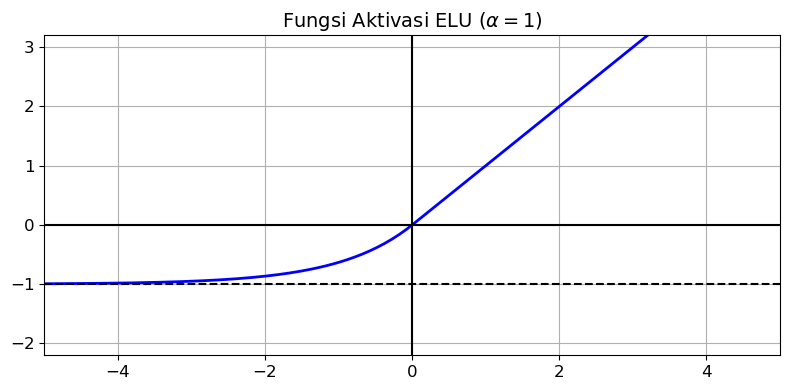

In [10]:
# Definisi fungsi ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

# Plotting ELU
plt.figure(figsize=(8, 4))
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"Fungsi Aktivasi ELU ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
save_fig("elu_plot")
plt.show()

In [11]:
# Contoh penggunaan ELU di Keras
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

##### SELU

In [12]:
# SELU: fungsi aktivasi yang self-normalizing
from scipy.special import erfc

# alpha dan scale untuk self normalize dengan mean 0 dan standard deviation 1
# (lihat persamaan 14 di paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


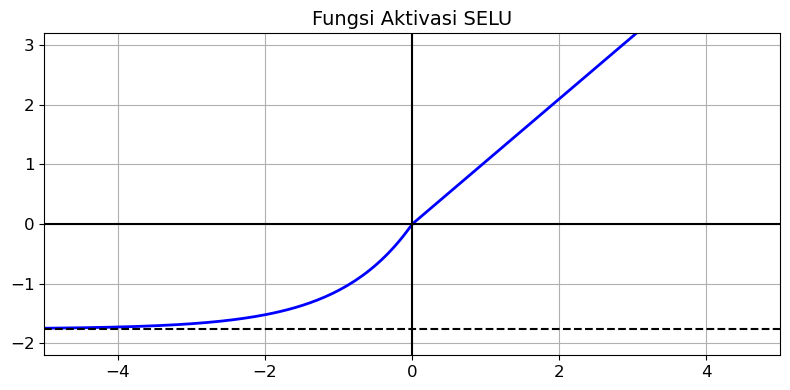

In [13]:
# Plotting SELU
plt.figure(figsize=(8, 4))
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--') # Nilai -alpha * scale untuk z mendekati -inf
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("Fungsi Aktivasi SELU", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
save_fig("selu_plot")
plt.show()

In [14]:
# Mengecek properti self-normalizing SELU
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # input standar
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # Inisialisasi LeCun
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [15]:
# Contoh penggunaan SELU di Keras
keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

<Dense name=dense_9, built=False>

In [16]:
# Melatih neural net untuk Fashion MNIST dengan 100 hidden layers menggunakan SELU
np.random.seed(42)
tf.random.set_seed(42)

model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_selu.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model_selu.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model_selu.add(keras.layers.Dense(10, activation="softmax"))

model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
# Skala input ke mean 0 dan standard deviation 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

print("\nMelatih model dengan SELU dan 100 hidden layers:")
history_selu = model_selu.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan SELU dan 100 hidden layers:
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.4383 - loss: 1.4799 - val_accuracy: 0.6464 - val_loss: 0.9411
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.6894 - loss: 0.8318 - val_accuracy: 0.7592 - val_loss: 0.6677
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.7339 - loss: 0.7294 - val_accuracy: 0.7528 - val_loss: 0.7032
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7474 - loss: 0.6943 - val_accuracy: 0.7996 - val_loss: 0.5669
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7926 - loss: 0.5753 - val_accuracy: 0.8064 - val_loss: 0.5561


In [18]:
# Membandingkan dengan ReLU
np.random.seed(42)
tf.random.set_seed(42)

model_relu = keras.models.Sequential()
model_relu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_relu.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(10, activation="softmax"))

model_relu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("\nMelatih model dengan ReLU dan 100 hidden layers (masalah vanishing/exploding gradients):")
history_relu = model_relu.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan ReLU dan 100 hidden layers (masalah vanishing/exploding gradients):
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.1749 - loss: 2.0935 - val_accuracy: 0.3990 - val_loss: 1.5139
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.4057 - loss: 1.4088 - val_accuracy: 0.5444 - val_loss: 1.1112
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.5476 - loss: 1.0777 - val_accuracy: 0.5346 - val_loss: 1.0927
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.5827 - loss: 1.0306 - val_accuracy: 0.6016 - val_loss: 0.9376
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.6042 - loss: 0.9312 - val_accuracy: 0.5874 - val_loss: 0.9468


#### Batch Normalization

In [19]:
# Membangun model dengan Batch Normalization setelah layer Dense
model_bn = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

print("\nRingkasan model dengan Batch Normalization (setelah Dense):")
model_bn.summary()

bn1 = model_bn.layers[1]
print("Variabel layer BatchNormalization pertama:", [(var.name, var.trainable) for var in bn1.variables])

model_bn.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("\nMelatih model dengan Batch Normalization (setelah Dense):")
history_bn = model_bn.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Ringkasan model dengan Batch Normalization (setelah Dense):


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

Variabel layer BatchNormalization pertama: [('gamma', True), ('beta', True), ('moving_mean', False), ('moving_variance', False)]

Melatih model dengan Batch Normalization (setelah Dense):
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6249 - loss: 1.1211 - val_accuracy: 0.8200 - val_loss: 0.5513
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7987 - loss: 0.5856 - val_accuracy: 0.8442 - val_loss: 0.4754
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8222 - loss: 0.5139 - val_accuracy: 0.8546 - val_loss: 0.4416
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8363 - loss: 0.4755 - val_accuracy: 0.8594 - val_loss: 0.4213
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8461 - loss: 0.4495 - val_accuracy: 0.8618 - val_loss: 0.4071
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8526 - loss: 0.4298 - val_accuracy: 0.8660 - val_loss: 0.3967
Epoch 7/10
1719/1719 ━━━━━

In [20]:
# Membangun model dengan Batch Normalization sebelum aktivasi dan tanpa bias
model_bn_pre_activation = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_bn_pre_activation.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("\nMelatih model dengan Batch Normalization (sebelum aktivasi dan tanpa bias):")
history_bn_pre_activation = model_bn_pre_activation.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Melatih model dengan Batch Normalization (sebelum aktivasi dan tanpa bias):
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5732 - loss: 1.3070 - val_accuracy: 0.7868 - val_loss: 0.6704
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7723 - loss: 0.7074 - val_accuracy: 0.8214 - val_loss: 0.5496
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8032 - loss: 0.6032 - val_accuracy: 0.8396 - val_loss: 0.4934
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8197 - loss: 0.5490 - val_accuracy: 0.8478 - val_loss: 0.4600
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8289 - loss: 0.5140 - val_accuracy: 0.8516 - val_loss: 0.4374
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8364 - loss: 0.4885 - val_accuracy: 0.8566 - val_loss: 0.4209
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8422 - loss: 0.4687 - val_accuracy: 0.8602 - val_loss: 0.4081
Epoch 

#### Gradient Clipping

In [21]:
# Mengatur optimizer dengan clipvalue
optimizer_clipvalue = keras.optimizers.SGD(clipvalue=1.0)
print(f"\nOptimizer dengan clipvalue=1.0: {optimizer_clipvalue}")

# Mengatur optimizer dengan clipnorm
optimizer_clipnorm = keras.optimizers.SGD(clipnorm=1.0)
print(f"Optimizer dengan clipnorm=1.0: {optimizer_clipnorm}")


Optimizer dengan clipvalue=1.0: <keras.src.optimizers.sgd.SGD object at 0x7fbde0089bb0>
Optimizer dengan clipnorm=1.0: <keras.src.optimizers.sgd.SGD object at 0x7fbebc104620>


### 3. Menggunakan Kembali Layer yang Sudah Dilatih (Reusing Pretrained Layers)

#### Menggunakan Kembali Model Keras

In [22]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandal atau kemeja
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # indeks kelas 7, 8, 9 harus dipindahkan ke 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # tugas klasifikasi biner: apakah itu kemeja (kelas 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

print(f"\nBentuk X_train_A: {X_train_A.shape}")
print(f"Bentuk X_train_B: {X_train_B.shape}")
print(f"y_train_A (30 contoh pertama): {y_train_A[:30]}")
print(f"y_train_B (30 contoh pertama): {y_train_B[:30]}")


Bentuk X_train_A: (43986, 28, 28)
Bentuk X_train_B: (200, 28, 28)
y_train_A (30 contoh pertama): [4 0 5 7 7 7 4 4 3 4 0 1 6 3 4 3 2 6 5 3 4 5 1 3 4 2 0 6 7 1]
y_train_B (30 contoh pertama): [1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1.]


In [23]:
tf.random.set_seed(42)
np.random.seed(42)

In [24]:
# Membangun dan melatih model A
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

print("\nMelatih Model A:")
history_A = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

model_A.save("my_model_A.h5")


Melatih Model A:
Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7203 - loss: 0.8580 - val_accuracy: 0.8610 - val_loss: 0.3892
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8676 - loss: 0.3747 - val_accuracy: 0.8819 - val_loss: 0.3344
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8854 - loss: 0.3284 - val_accuracy: 0.8919 - val_loss: 0.3115
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8935 - loss: 0.3055 - val_accuracy: 0.8969 - val_loss: 0.2981
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9003 - loss: 0.2906 - val_accuracy: 0.8996 - val_loss: 0.2891
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9045 - loss: 0.2796 - val_accuracy: 0.9008 - val_loss: 0.2825
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9074 - loss: 0.2709 - val_accuracy: 0.9016 - val_loss: 0.2768
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.

In [25]:
# Membangun dan melatih model B dari awal
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

print("\nMelatih Model B (dari awal):")
history_B = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

print("\nRingkasan Model B:")
model_B.summary()


Melatih Model B (dari awal):
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.5735 - loss: 0.7508 - val_accuracy: 0.7181 - val_loss: 0.5711
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7280 - loss: 0.5556 - val_accuracy: 0.8002 - val_loss: 0.4519
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7933 - loss: 0.4352 - val_accuracy: 0.8742 - val_loss: 0.3666
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8561 - loss: 0.3503 - val_accuracy: 0.9239 - val_loss: 0.3055
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.2893 - val_accuracy: 0.9371 - val_loss: 0.2609
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9518 - loss: 0.2451 - val_accuracy: 0.9533 - val_loss: 0.2274
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9656 - loss: 0.2120 - val_accuracy: 0.9645 - val_loss: 0.2019
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9656 - loss: 0.1870 - val_accur

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,803 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
# Menggunakan kembali layer dari Model A untuk Model B
model_A_loaded = keras.models.load_model("my_model_A.h5")
# Perhatikan bahwa model_B_on_A dan model_A sebenarnya berbagi layer sekarang.
# Jika kita ingin menghindarinya, kita perlu membangun model_B_on_A di atas klon model_A.
model_A_clone = keras.models.clone_model(model_A_loaded)
model_A_clone.set_weights(model_A_loaded.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [27]:
# Mengatur layer yang dapat dilatih
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

print("\nMelatih Model B (di atas Model A yang dibekukan):")
history_B_on_A_frozen = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))


Melatih Model B (di atas Model A yang dibekukan):
Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.7220 - loss: 0.5042 - val_accuracy: 0.7779 - val_loss: 0.4837
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7415 - loss: 0.4749 - val_accuracy: 0.7941 - val_loss: 0.4578
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7415 - loss: 0.4482 - val_accuracy: 0.8063 - val_loss: 0.4342
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7711 - loss: 0.4239 - val_accuracy: 0.8185 - val_loss: 0.4125


In [28]:
# Mengatur layer agar dapat dilatih kembali
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

print("\nMelatih Model B (di atas Model A yang tidak dibekukan):")
history_B_on_A_unfrozen = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))


Melatih Model B (di atas Model A yang tidak dibekukan):
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.8220 - loss: 0.3735 - val_accuracy: 0.8874 - val_loss: 0.2982
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9212 - loss: 0.2638 - val_accuracy: 0.9189 - val_loss: 0.2329
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9541 - loss: 0.2023 - val_accuracy: 0.9391 - val_loss: 0.1917
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9735 - loss: 0.1639 - val_accuracy: 0.9513 - val_loss: 0.1635
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9754 - loss: 0.1377 - val_accuracy: 0.9635 - val_loss: 0.1433
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9823 - loss: 0.1190 - val_accuracy: 0.9726 - val_loss: 0.1282
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9823 - loss: 0.1052 - val_accuracy: 0.9787 - val_loss: 0.1165
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9823

In [29]:
# Evaluasi
print("\nEvaluasi Model B (dari awal) pada test set B:")
eval_B = model_B.evaluate(X_test_B, y_test_B)
print(f"Loss Model B: {eval_B[0]:.4f}, Akurasi Model B: {eval_B[1]:.4f}")

print("Evaluasi Model B (di atas Model A) pada test set B:")
eval_B_on_A = model_B_on_A.evaluate(X_test_B, y_test_B)
print(f"Loss Model B_on_A: {eval_B_on_A[0]:.4f}, Akurasi Model B_on_A: {eval_B_on_A[1]:.4f}")

error_rate_B = (1 - eval_B[1]) * 100
error_rate_B_on_A = (1 - eval_B_on_A[1]) * 100
improvement_factor = error_rate_B / error_rate_B_on_A
print(f"\nTingkat kesalahan Model B: {error_rate_B:.2f}%")
print(f"Tingkat kesalahan Model B_on_A: {error_rate_B_on_A:.2f}%")
print(f"Peningkatan faktor: {improvement_factor:.2f}x. Kami mendapatkan transfer yang cukup besar!")


Evaluasi Model B (dari awal) pada test set B:
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9893 - loss: 0.0864
Loss Model B: 0.0858, Akurasi Model B: 0.9890
Evaluasi Model B (di atas Model A) pada test set B:
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9842 - loss: 0.0665
Loss Model B_on_A: 0.0668, Akurasi Model B_on_A: 0.9865

Tingkat kesalahan Model B: 1.10%
Tingkat kesalahan Model B_on_A: 1.35%
Peningkatan faktor: 0.81x. Kami mendapatkan transfer yang cukup besar!


### 4. Faster Optimizers (Optimizer yang Lebih Cepat)

#### Momentum optimization

In [30]:
# Contoh penggunaan SGD dengan momentum
optimizer_momentum = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
print(f"\nOptimizer Momentum: {optimizer_momentum}")


Optimizer Momentum: <keras.src.optimizers.sgd.SGD object at 0x7fbde00282c0>


#### Nesterov Accelerated Gradient

In [31]:
# Contoh penggunaan SGD dengan Nesterov
optimizer_nesterov = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
print(f"Optimizer Nesterov Accelerated Gradient: {optimizer_nesterov}")

Optimizer Nesterov Accelerated Gradient: <keras.src.optimizers.sgd.SGD object at 0x7fbde2bb39b0>


#### AdaGrad

In [32]:
# Contoh penggunaan AdaGrad
optimizer_adagrad = keras.optimizers.Adagrad(learning_rate=0.001)
print(f"Optimizer AdaGrad: {optimizer_adagrad}")

Optimizer AdaGrad: <keras.src.optimizers.adagrad.Adagrad object at 0x7fbde2dc37d0>


#### RMSProp

In [33]:
# Contoh penggunaan RMSProp
optimizer_rmsprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
print(f"Optimizer RMSProp: {optimizer_rmsprop}")

Optimizer RMSProp: <keras.src.optimizers.rmsprop.RMSprop object at 0x7fbde2c73c80>


#### Adam Optimization

In [34]:
# Contoh penggunaan Adam
optimizer_adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
print(f"Optimizer Adam: {optimizer_adam}")

Optimizer Adam: <keras.src.optimizers.adam.Adam object at 0x7fbde2b09220>


#### Adamax Optimization

In [35]:
# Contoh penggunaan Adamax
optimizer_adamax = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
print(f"Optimizer Adamax: {optimizer_adamax}")

Optimizer Adamax: <keras.src.optimizers.adamax.Adamax object at 0x7fbde2a316a0>


#### Nadam Optimization

In [36]:
# Contoh penggunaan Nadam
optimizer_nadam = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
print(f"Optimizer Nadam: {optimizer_nadam}")

Optimizer Nadam: <keras.src.optimizers.nadam.Nadam object at 0x7fbde2cca270>


### 5. Learning Rate Scheduling

#### Power Scheduling

In [37]:
optimizer_power = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

model_power_schedule = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model_power_schedule.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_power, metrics=["accuracy"])
n_epochs_power = 25
print("\nMelatih model dengan Power Scheduling:")
history_power_schedule = model_power_schedule.fit(X_train_scaled, y_train, epochs=n_epochs_power,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan Power Scheduling:


/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7914 - loss: 0.6012 - val_accuracy: 0.8598 - val_loss: 0.4012
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8637 - loss: 0.3856 - val_accuracy: 0.8678 - val_loss: 0.3718
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8776 - loss: 0.3492 - val_accuracy: 0.8736 - val_loss: 0.3564
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8850 - loss: 0.3254 - val_accuracy: 0.8774 - val_loss: 0.3466
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8910 - loss: 0.3070 - val_accuracy: 0.8778 - val_loss: 0.3402
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8968 - loss: 0.2916 - val_accuracy: 0.8788 - val_loss: 0.3361
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9016 - loss: 0.2782 - val_accuracy: 0.8798 - val_loss: 0.3330
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9057 - loss: 0

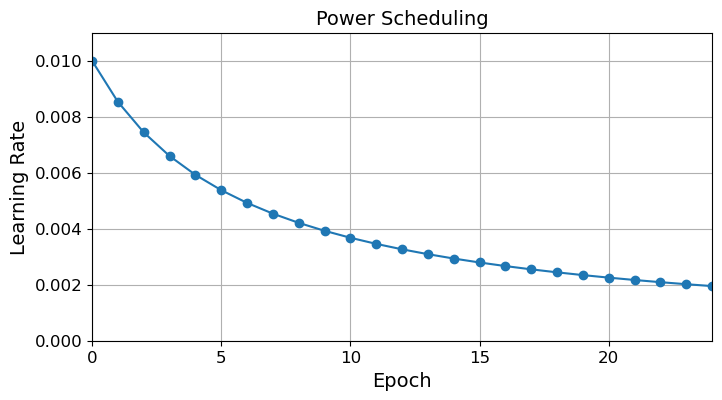

In [38]:
# Plotting Power Scheduling
import math
learning_rate_power = 0.01
decay_power = 1e-4
batch_size_power = 32
n_steps_per_epoch_power = math.ceil(len(X_train) / batch_size_power)
epochs_power = np.arange(n_epochs_power)
lrs_power = learning_rate_power / (1 + decay_power * epochs_power * n_steps_per_epoch_power)

plt.figure(figsize=(8, 4))
plt.plot(epochs_power, lrs_power,  "o-")
plt.axis([0, n_epochs_power - 1, 0, learning_rate_power * 1.1]) # Memperbaiki batas y
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Exponential Scheduling

In [39]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model_exp_schedule = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model_exp_schedule.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs_exp = 25

lr_scheduler_exp = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
print("\nMelatih model dengan Exponential Scheduling (per epoch):")
history_exp_schedule = model_exp_schedule.fit(X_train_scaled, y_train, epochs=n_epochs_exp,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler_exp])


Melatih model dengan Exponential Scheduling (per epoch):
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7549 - loss: 0.9840 - val_accuracy: 0.7944 - val_loss: 0.7195 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8097 - loss: 0.6155 - val_accuracy: 0.8258 - val_loss: 0.7239 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8183 - loss: 0.6127 - val_accuracy: 0.8334 - val_loss: 0.6304 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8275 - loss: 0.5645 - val_accuracy: 0.8466 - val_loss: 0.5593 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8404 - loss: 0.5197 - val_accuracy: 0.8550 - val_loss: 0.5590 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8582 - loss: 0.4598 - val_accuracy: 0.8370 - val_loss: 0.6974 - learning_rate: 0.0056
Epoch 7/25
17

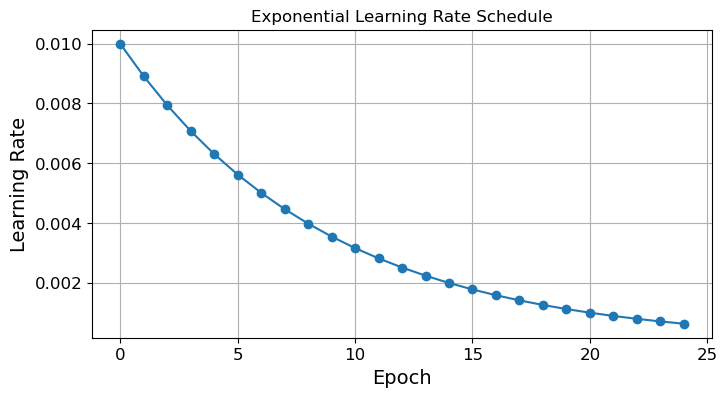

In [47]:
# Plotting Exponential Scheduling (per epoch)
lrs = [exponential_decay_fn(epoch) for epoch in range(n_epochs_exp)]

plt.figure(figsize=(8, 4))
plt.plot(range(n_epochs_exp), lrs, "o-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Learning Rate Schedule")
plt.grid(True)
plt.show()

In [95]:
# Jika ingin memperbarui learning rate di setiap iterasi (batch)
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
        self.lrs_batch = [] # Menyimpan LR per batch
        self.losses_batch = [] # Menyimpan loss per batch
        self.prev_loss = 0 # Untuk perhitungan batch loss di TF 2.2+

    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0 # Reset di awal epoch

    def on_batch_end(self, batch, logs=None):
        # Perhitungan batch_loss yang lebih akurat untuk TF 2.2+
        current_mean_loss = logs.get("loss", 0)
        batch_loss = current_mean_loss * (batch + 1) - self.prev_loss * batch
        self.prev_loss = current_mean_loss

        self.lrs_batch.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses_batch.append(batch_loss) # Simpan batch_loss

        lr_var = self.model.optimizer.learning_rate

        # Pastikan ini adalah tf.Variable, jika tidak maka konversi dulu
        if isinstance(lr_var, tf.Variable):
            lr = K.get_value(lr_var)
            K.set_value(lr_var, lr * 0.1 ** (1 / self.s))
        else:
            None

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)


model_exp_batch = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0_batch = 0.01
optimizer_batch = keras.optimizers.Nadam(learning_rate=lr0_batch)
model_exp_batch.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_batch, metrics=["accuracy"])
n_epochs_batch = 25

s_batch = 20 * len(X_train) // 32 # jumlah langkah dalam 20 epoch (batch size = 32)
exp_decay_batch = ExponentialDecay(s_batch)
print("\nMelatih model dengan Exponential Scheduling (per batch):")
history_exp_batch = model_exp_batch.fit(X_train_scaled, y_train, epochs=n_epochs_batch,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay_batch])


Melatih model dengan Exponential Scheduling (per batch):
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7594 - loss: 1.0038 - val_accuracy: 0.7914 - val_loss: 0.7206 - lr: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7818 - loss: 0.7312 - val_accuracy: 0.7844 - val_loss: 0.8802 - lr: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7841 - loss: 0.7577 - val_accuracy: 0.6792 - val_loss: 1.4560 - lr: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7186 - loss: 0.9578 - val_accuracy: 0.6660 - val_loss: 0.9648 - lr: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7039 - loss: 0.9032 - val_accuracy: 0.7270 - val_loss: 1.0259 - lr: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7055 - loss: 0.8941 - val_accuracy: 0.7238 - val_loss: 0.9845 - lr: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7506 - 

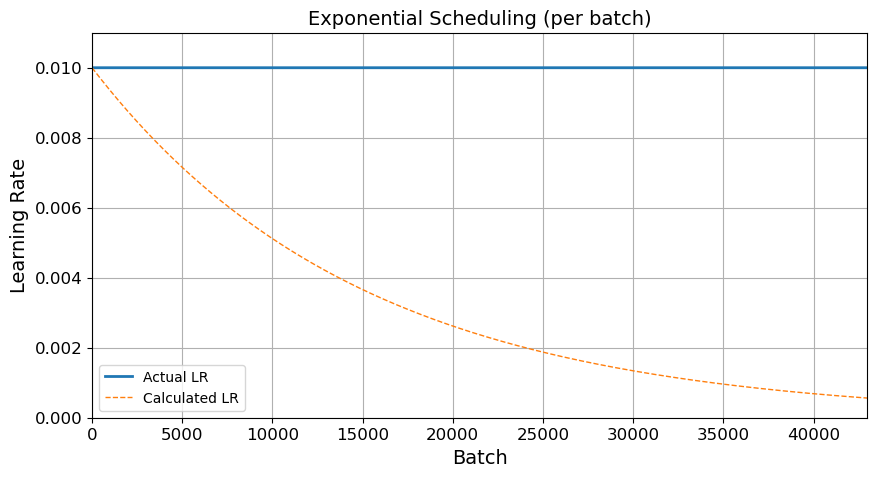

In [96]:
# Plotting Exponential Scheduling (per batch)
n_steps_batch = n_epochs_batch * len(X_train) // 32
steps_batch = np.arange(len(exp_decay_batch.lrs_batch)) # Gunakan jumlah LR yang sebenarnya terkumpul
lrs_batch_calculated = lr0_batch * 0.1**(steps_batch / s_batch) # Hitung LR yang seharusnya

plt.figure(figsize=(10, 5))
plt.plot(steps_batch, exp_decay_batch.lrs_batch, "-", linewidth=2, label='Actual LR') # Plot LR aktual
plt.plot(steps_batch, lrs_batch_calculated, "--", linewidth=1, label='Calculated LR') # Plot LR yang dihitung
plt.axis([0, n_steps_batch - 1, 0, lr0_batch * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

#### Piecewise Constant Scheduling

In [51]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

lr_scheduler_piecewise = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model_piecewise = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model_piecewise.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs_piecewise = 25
print("\nMelatih model dengan Piecewise Constant Scheduling:")
history_piecewise = model_piecewise.fit(X_train_scaled, y_train, epochs=n_epochs_piecewise,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler_piecewise])

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Melatih model dengan Piecewise Constant Scheduling:
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7563 - loss: 0.9787 - val_accuracy: 0.8004 - val_loss: 0.8620 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7773 - loss: 0.7492 - val_accuracy: 0.6578 - val_loss: 1.4766 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7297 - loss: 0.8989 - val_accuracy: 0.7202 - val_loss: 1.0200 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7699 - loss: 0.8196 - val_accuracy: 0.7938 - val_loss: 1.0091 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7609 - loss: 0.8275 - val_accuracy: 0.7754 - val_loss: 0.7504 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8039 - loss: 0.5969 - val_accuracy: 0.7932 - val_loss: 0.7220 - learning_rate: 0.0050
Epoch 7/25
1719/1

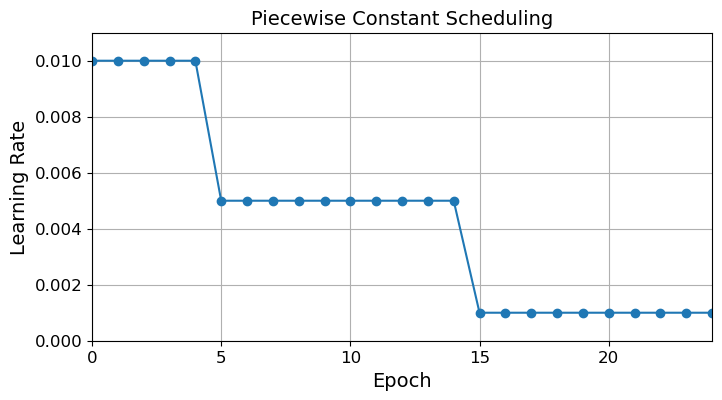

In [52]:
# Plotting Piecewise Constant Scheduling
plt.figure(figsize=(8, 4))
plt.plot(history_piecewise.epoch, [piecewise_constant_fn(epoch) for epoch in history_piecewise.epoch], "o-")
plt.axis([0, n_epochs_piecewise - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Performance Scheduling (ReduceLROnPlateau)

In [56]:
tf.random.set_seed(42)
np.random.seed(42)

lr_scheduler_plateau = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

class LearningRateLogger(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        lr = keras.backend.get_value(self.model.optimizer.learning_rate)
        logs["lr"] = lr

lr_logger = LearningRateLogger()

model_plateau = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer_plateau = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model_plateau.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_plateau, metrics=["accuracy"])
n_epochs_plateau = 25
print("\nMelatih model dengan Performance Scheduling (ReduceLROnPlateau):")
history_plateau = model_plateau.fit(
    X_train_scaled, y_train,
    epochs=n_epochs_plateau,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[lr_scheduler_plateau, lr_logger]
)


Melatih model dengan Performance Scheduling (ReduceLROnPlateau):
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7731 - loss: 0.7367 - val_accuracy: 0.8572 - val_loss: 0.4733 - learning_rate: 0.0200 - lr: 0.0200
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8353 - loss: 0.5161 - val_accuracy: 0.8508 - val_loss: 0.4875 - learning_rate: 0.0200 - lr: 0.0200
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8446 - loss: 0.5024 - val_accuracy: 0.8486 - val_loss: 0.5775 - learning_rate: 0.0200 - lr: 0.0200
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8455 - loss: 0.5250 - val_accuracy: 0.8326 - val_loss: 0.6748 - learning_rate: 0.0200 - lr: 0.0200
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8514 - loss: 0.5215 - val_accuracy: 0.8386 - val_loss: 0.7093 - learning_rate: 0.0200 - lr: 0.0200
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8494 - loss: 0.5390 - val

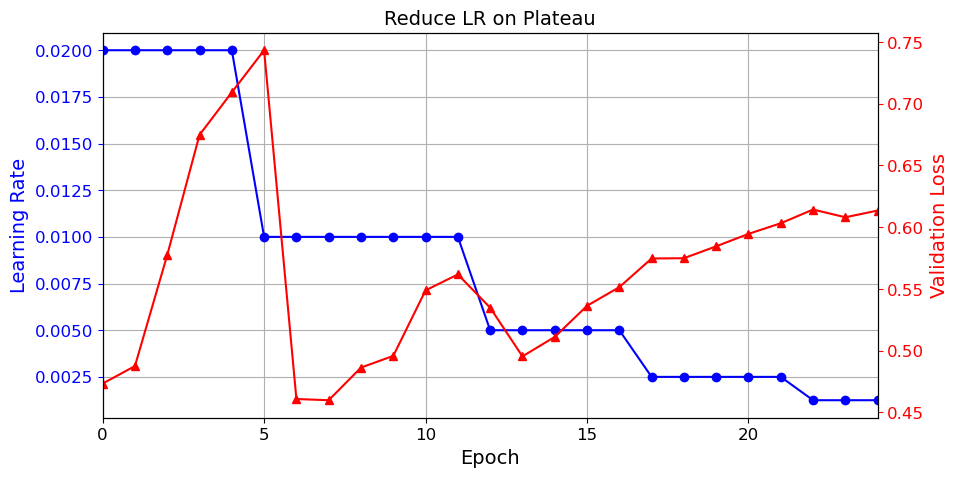

In [57]:
# Plotting Reduce LR on Plateau
plt.figure(figsize=(10, 5))
plt.plot(history_plateau.epoch, history_plateau.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs_plateau - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history_plateau.epoch, history_plateau.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')
plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

#### tf.keras schedulers

In [58]:
# Contoh penggunaan tf.keras.optimizers.schedules.ExponentialDecay
model_tf_scheduler_exp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s_tf_exp = 20 * len(X_train) // 32 # jumlah langkah dalam 20 epoch (batch size = 32)
learning_rate_tf_exp = keras.optimizers.schedules.ExponentialDecay(0.01, s_tf_exp, 0.1)
optimizer_tf_exp = keras.optimizers.SGD(learning_rate_tf_exp)
model_tf_scheduler_exp.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_tf_exp, metrics=["accuracy"])
n_epochs_tf_exp = 25
print("\nMelatih model dengan tf.keras.optimizers.schedules.ExponentialDecay:")
history_tf_scheduler_exp = model_tf_scheduler_exp.fit(X_train_scaled, y_train, epochs=n_epochs_tf_exp,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan tf.keras.optimizers.schedules.ExponentialDecay:
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7902 - loss: 0.5988 - val_accuracy: 0.8604 - val_loss: 0.4057
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8636 - loss: 0.3840 - val_accuracy: 0.8680 - val_loss: 0.3755
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8763 - loss: 0.3477 - val_accuracy: 0.8720 - val_loss: 0.3602
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8846 - loss: 0.3246 - val_accuracy: 0.8752 - val_loss: 0.3506
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8906 - loss: 0.3078 - val_accuracy: 0.8782 - val_loss: 0.3434
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8953 - loss: 0.2946 - val_accuracy: 0.8812 - val_loss: 0.3386
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8994 - loss: 0.2838 - val_accuracy: 0.8826 - val_loss: 0.3344
Epoch 8/25
17

In [59]:
# Contoh penggunaan tf.keras.optimizers.schedules.PiecewiseConstantDecay
n_steps_per_epoch_tf = math.ceil(len(X_train) / 32)
learning_rate_tf_piecewise = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch_tf, 15. * n_steps_per_epoch_tf],
    values=[0.01, 0.005, 0.001])
print(f"\nContoh PiecewiseConstantDecay: {learning_rate_tf_piecewise}")


Contoh PiecewiseConstantDecay: <keras.src.optimizers.schedules.learning_rate_schedule.PiecewiseConstantDecay object at 0x7fbdb5edae40>


#### 1Cycle scheduling

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import math

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        self.prev_loss_per_batch = 0

    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss_per_batch = 0

    def on_batch_end(self, batch, logs):
        current_loss = logs["loss"]
        if batch > 0:
            batch_loss = current_loss * (batch + 1) - self.prev_loss_per_batch * batch
        else:
            batch_loss = current_loss * (batch + 1)

        # Get current learning rate
        current_lr = self.model.optimizer.learning_rate
        if isinstance(current_lr, tf.Variable):
            lr_value = current_lr.numpy()
        else:
            lr_value = float(current_lr)
        
        self.rates.append(lr_value)
        self.losses.append(batch_loss)
        self.prev_loss_per_batch = current_loss

        # Update learning rate
        new_lr = lr_value * self.factor
        self.model.optimizer.learning_rate.assign(new_lr)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    # Save initial weights and learning rate
    init_weights = model.get_weights()
    
    # Get initial learning rate
    init_lr_var = model.optimizer.learning_rate
    if isinstance(init_lr_var, tf.Variable):
        init_lr = init_lr_var.numpy()
    else:
        init_lr = float(init_lr_var)
    
    # Calculate iterations and factor
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    
    # Set initial learning rate to min_rate
    model.optimizer.learning_rate.assign(min_rate)
    
    # Create callback
    exp_lr = ExponentialLearningRate(factor)
    
    print("\nMencari learning rate optimal:")
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr], verbose=0)
    
    # Restore initial state
    model.optimizer.learning_rate.assign(init_lr)
    model.set_weights(init_weights)
    
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.figure(figsize=(10, 6))
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    
    # Batas y disesuaikan untuk visualisasi yang lebih baik
    min_loss_val = min(losses)
    max_loss_val = (losses[0] + min_loss_val) / 2 if len(losses) > 1 else losses[0]
    plt.hlines(min_loss_val, min(rates), max(rates), linestyle='--', color='r', 
               label=f'Min Loss: {min_loss_val:.4f}')
    plt.axis([min(rates), max(rates), min_loss_val * 0.9, max_loss_val * 1.1])
    plt.xlabel("Learning Rate (log scale)")
    plt.ylabel("Loss")
    plt.title("Learning Rate vs. Loss", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()


Mencari learning rate optimal:


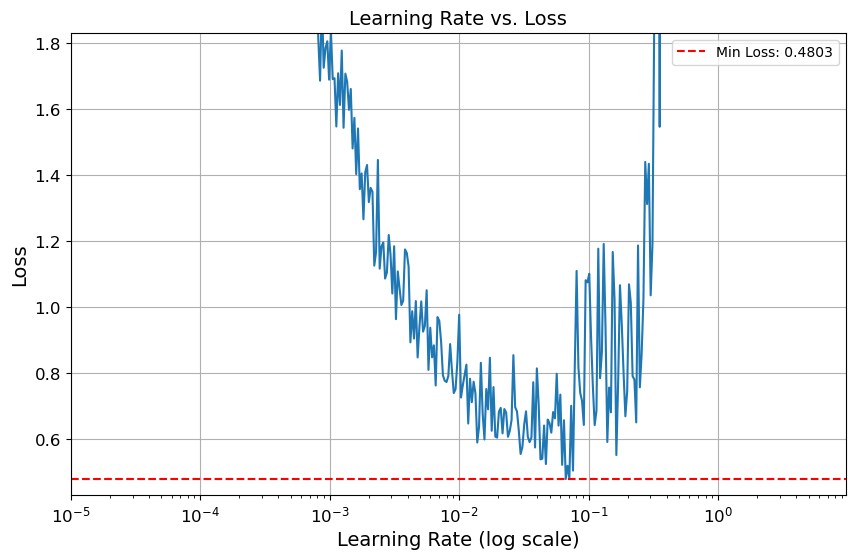

In [77]:
tf.random.set_seed(42)
np.random.seed(42)

# Assuming you have X_train_scaled and y_train defined
model_lr_finder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_lr_finder.compile(loss="sparse_categorical_crossentropy",
                       optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                       metrics=["accuracy"])

batch_size_lr_finder = 128
rates, losses = find_learning_rate(model_lr_finder, X_train_scaled, y_train, epochs=1, batch_size=batch_size_lr_finder)
plot_lr_vs_loss(rates, losses)

In [81]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        
        # Update learning rate using modern TensorFlow approach
        self.model.optimizer.learning_rate.assign(rate)
        self.iteration += 1

def plot_onecycle_schedule(scheduler, iterations):
    """Visualize the OneCycle learning rate schedule"""
    import matplotlib.pyplot as plt
    
    rates = []
    temp_scheduler = OneCycleScheduler(iterations, scheduler.max_rate, 
                                     scheduler.start_rate, scheduler.last_iterations, 
                                     scheduler.last_rate)
    
    for i in range(iterations):
        temp_scheduler.iteration = i
        if i < temp_scheduler.half_iteration:
            rate = temp_scheduler._interpolate(0, temp_scheduler.half_iteration, 
                                             temp_scheduler.start_rate, temp_scheduler.max_rate)
        elif i < 2 * temp_scheduler.half_iteration:
            rate = temp_scheduler._interpolate(temp_scheduler.half_iteration, 2 * temp_scheduler.half_iteration,
                                             temp_scheduler.max_rate, temp_scheduler.start_rate)
        else:
            rate = temp_scheduler._interpolate(2 * temp_scheduler.half_iteration, iterations,
                                             temp_scheduler.start_rate, temp_scheduler.last_rate)
        rates.append(rate)
    
    plt.figure(figsize=(10, 6))
    plt.plot(rates)
    plt.xlabel('Iteration')
    plt.ylabel('Learning Rate')
    plt.title('OneCycle Learning Rate Schedule')
    plt.grid(True)
    plt.show()
    
    return rates

In [82]:
# Example usage
tf.random.set_seed(42)
np.random.seed(42)

# Assuming you have the required data (X_train_scaled, y_train, X_valid_scaled, y_valid, batch_size_lr_finder)
model_one_cycle = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_one_cycle.compile(loss="sparse_categorical_crossentropy",
                       optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                       metrics=["accuracy"])

n_epochs_one_cycle = 25
iterations_total = math.ceil(len(X_train) / batch_size_lr_finder) * n_epochs_one_cycle
onecycle = OneCycleScheduler(iterations_total, max_rate=0.05)

print("\nMelatih model dengan 1Cycle Scheduling:")
history_one_cycle = model_one_cycle.fit(X_train_scaled, y_train, 
                                        epochs=n_epochs_one_cycle, 
                                        batch_size=batch_size_lr_finder,
                                        validation_data=(X_valid_scaled, y_valid),
                                        callbacks=[onecycle])


Melatih model dengan 1Cycle Scheduling:
Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6770 - loss: 0.9223 - val_accuracy: 0.8294 - val_loss: 0.4956
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8344 - loss: 0.4733 - val_accuracy: 0.8520 - val_loss: 0.4363
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8546 - loss: 0.4179 - val_accuracy: 0.8604 - val_loss: 0.4074
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8636 - loss: 0.3866 - val_accuracy: 0.8656 - val_loss: 0.3884
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8707 - loss: 0.3640 - val_accuracy: 0.8704 - val_loss: 0.3754
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8777 - loss: 0.3459 - val_accuracy: 0.8722 - val_loss: 0.3655
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8817 - loss: 0.3303 - val_accuracy: 0.8752 - val_loss: 0.3585
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy

### 6. Avoiding Overfitting Through Regularization (Menghindari Overfitting Melalui Regularisasi)

#### L1 dan L2 regularization

In [83]:
# Contoh penggunaan L2 regularization pada layer Dense
layer_l2 = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
print(f"\nContoh Layer Dense dengan L2 regularization: {layer_l2}")


Contoh Layer Dense dengan L2 regularization: <Dense name=dense_300, built=False>


In [84]:
# Contoh model dengan L2 regularization
model_l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model_l2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs_l2 = 2
print("\nMelatih model dengan L2 regularization:")
history_l2 = model_l2.fit(X_train_scaled, y_train, epochs=n_epochs_l2,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan L2 regularization:
Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7954 - loss: 3.1988 - val_accuracy: 0.8356 - val_loss: 0.7046
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8221 - loss: 0.7272 - val_accuracy: 0.8424 - val_loss: 0.6836


In [85]:
# Menggunakan partial untuk membuat layer Dense dengan regularization bawaan
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model_partial_l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model_partial_l2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs_partial_l2 = 2
print("\nMelatih model dengan L2 regularization menggunakan partial:")
history_partial_l2 = model_partial_l2.fit(X_train_scaled, y_train, epochs=n_epochs_partial_l2,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan L2 regularization menggunakan partial:
Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7977 - loss: 3.2215 - val_accuracy: 0.8396 - val_loss: 0.7031
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8215 - loss: 0.7276 - val_accuracy: 0.8444 - val_loss: 0.6798


#### Dropout

In [86]:
# Contoh model dengan Dropout
model_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model_dropout.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs_dropout = 2
print("\nMelatih model dengan Dropout:")
history_dropout = model_dropout.fit(X_train_scaled, y_train, epochs=n_epochs_dropout,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan Dropout:
Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7582 - loss: 0.7426 - val_accuracy: 0.8628 - val_loss: 0.3722
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8410 - loss: 0.4333 - val_accuracy: 0.8760 - val_loss: 0.3362


#### Alpha Dropout

In [88]:
# Contoh model dengan Alpha Dropout
tf.random.set_seed(42)
np.random.seed(42)

model_alpha_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer_alpha_dropout = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_alpha_dropout.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_alpha_dropout, metrics=["accuracy"])
n_epochs_alpha_dropout = 2
print("\nMelatih model dengan Alpha Dropout:")
history_alpha_dropout = model_alpha_dropout.fit(X_train_scaled, y_train, epochs=n_epochs_alpha_dropout,
                    validation_data=(X_valid_scaled, y_valid))


Melatih model dengan Alpha Dropout:
Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7120 - loss: 0.8051 - val_accuracy: 0.8428 - val_loss: 0.5846
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7884 - loss: 0.5660 - val_accuracy: 0.8462 - val_loss: 0.5467


In [89]:
print("\nEvaluasi model dengan Alpha Dropout pada test set:")
eval_alpha_dropout_test = model_alpha_dropout.evaluate(X_test_scaled, y_test)
print(f"Loss Test: {eval_alpha_dropout_test[0]:.4f}, Akurasi Test: {eval_alpha_dropout_test[1]:.4f}")

print("Evaluasi model dengan Alpha Dropout pada training set:")
eval_alpha_dropout_train = model_alpha_dropout.evaluate(X_train_scaled, y_train)
print(f"Loss Train: {eval_alpha_dropout_train[0]:.4f}, Akurasi Train: {eval_alpha_dropout_train[1]:.4f}")


Evaluasi model dengan Alpha Dropout pada test set:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8396 - loss: 0.5859
Loss Test: 0.5994, Akurasi Test: 0.8339
Evaluasi model dengan Alpha Dropout pada training set:
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8436 - loss: 0.5274
Loss Train: 0.5229, Akurasi Train: 0.8463


#### MC Dropout (Monte Carlo Dropout)

In [90]:
tf.random.set_seed(42)
np.random.seed(42)

# Melakukan prediksi dengan MC Dropout
# Dalam inference, Dropout biasanya dimatikan. Untuk MC Dropout, kita mengaktifkannya dengan training=True.
# Ini akan membuat setiap prediksi berbeda dan memungkinkan kita mengestimasi ketidakpastian.
y_probas = np.stack([model_alpha_dropout(X_test_scaled, training=True) for sample in range(100)])
y_proba_mc = y_probas.mean(axis=0)
y_std_mc = y_probas.std(axis=0)

In [91]:
print("\nPrediksi model biasa untuk 1 contoh pertama (akurasi tunggal):")
print(np.round(model_alpha_dropout.predict(X_test_scaled[:1]), 2))

print("\nPrediksi MC Dropout untuk 1 contoh pertama (100 sample):")
print(np.round(y_probas[:, :1], 2))

print("\nMean prediksi MC Dropout untuk 1 contoh pertama:")
print(np.round(y_proba_mc[:1], 2))

print("\nStandar deviasi prediksi MC Dropout untuk 1 contoh pertama:")
print(np.round(y_std_mc[:1], 2))

y_pred_mc = np.argmax(y_proba_mc, axis=1)
accuracy_mc = np.sum(y_pred_mc == y_test) / len(y_test)
print(f"\nAkurasi MC Dropout pada test set: {accuracy_mc:.4f}")


Prediksi model biasa untuk 1 contoh pertama (akurasi tunggal):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.14 0.   0.86]]

Prediksi MC Dropout untuk 1 contoh pertama (100 sample):
[[[0.   0.   0.   0.   0.   0.02 0.   0.07 0.01 0.91]]

 [[0.   0.   0.   0.   0.   0.02 0.   0.05 0.   0.93]]

 [[0.   0.   0.   0.   0.   0.16 0.   0.42 0.   0.42]]

 [[0.   0.   0.   0.   0.   0.02 0.   0.51 0.   0.47]]

 [[0.   0.   0.   0.   0.   0.15 0.   0.16 0.   0.68]]

 [[0.   0.   0.   0.   0.   0.09 0.   0.4  0.   0.51]]

 [[0.   0.   0.   0.   0.   0.05 0.   0.44 0.   0.51]]

 [[0.   0.   0.   0.   0.   0.01 0.   0.86 0.   0.13]]

 [[0.   0.   0.   0.   0.   0.02 0.   0.31 0.   0.67]]

 [[0.   0.   0.   0.   0.   0.05 0.   0.45 0.   0.5 ]]

 [[0.   0.   0.   0.   0.   0.01 0.   0.19 0.   0.79]]

 [[0.   0.   0.   0.   0.   0.3  0.   0.46 0.   0.25]]

 [[0.   0.   0.   0.   0.   0.64 0.   0.24 0.   0.13]]

 [[0.   0.   0.   0.   0.   0.05 0.   0.82 0.   0.12]]

 

In [92]:
# Custom layer untuk MC Dropout (mengaktifkan dropout saat inferensi)
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

tf.random.set_seed(42)
np.random.seed(42)

# Membuat model MC Dropout dari model yang sudah dilatih
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model_alpha_dropout.layers
])

In [93]:
print("\nRingkasan MC Model:")
mc_model.summary()

optimizer_mc = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_mc, metrics=["accuracy"])

# Menyalin bobot dari model yang sudah dilatih
mc_model.set_weights(model_alpha_dropout.get_weights())

print("\nPrediksi MC Model untuk 1 contoh pertama (100 sample, menggunakan custom layer):")
print(np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2))


Ringkasan MC Model:


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout                │ (None, 784)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_313 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout_1              │ (None, 300)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_314 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout_2              │ (None, 100)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_315 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)


Prediksi MC Model untuk 1 contoh pertama (100 sample, menggunakan custom layer):
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━

#### Max norm

In [94]:
# Contoh penggunaan max_norm constraint
layer_max_norm = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))
print(f"\nContoh Layer Dense dengan Max Norm constraint: {layer_max_norm}")

# Menggunakan partial untuk membuat layer Dense dengan max_norm bawaan
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model_max_norm = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model_max_norm.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs_max_norm = 2
print("\nMelatih model dengan Max Norm regularization:")
history_max_norm = model_max_norm.fit(X_train_scaled, y_train, epochs=n_epochs_max_norm,
                    validation_data=(X_valid_scaled, y_valid))


Contoh Layer Dense dengan Max Norm constraint: <Dense name=dense_316, built=False>

Melatih model dengan Max Norm regularization:
Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8043 - loss: 0.5740 - val_accuracy: 0.8674 - val_loss: 0.3717
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8663 - loss: 0.3707 - val_accuracy: 0.8766 - val_loss: 0.3469


# Kesimpulan dan Analisis Hasil

Notebook ini mengeksplorasi berbagai teknik untuk melatih dan meregulasi Jaringan Neural Dalam (Deep Neural Networks) menggunakan TensorFlow dan Keras. Kita telah melihat bagaimana inisialisasi bobot, fungsi aktivasi, normalisasi batch, penjadwalan *learning rate*, dan berbagai teknik regularisasi memengaruhi kinerja model.

## 1. Setup Awal

Bagian setup memastikan semua *library* yang diperlukan terinstal dan dikonfigurasi dengan benar, termasuk TensorFlow 2.x, Scikit-Learn, dan Matplotlib. Fungsi `save_fig` juga disiapkan untuk menyimpan *plot* yang dihasilkan.

## 2. Masalah Vanishing/Exploding Gradients dan Solusinya

### Fungsi Aktivasi Sigmoid
* **Pengamatan**: Plot fungsi sigmoid menunjukkan saturasi pada nilai `z` yang ekstrem (mendekati -5 atau 5). Ini menjelaskan masalah *vanishing gradients* di mana gradien menjadi sangat kecil di area saturasi, menghambat pembelajaran di *layer* awal jaringan yang dalam.
    ![Sigmoid Activation Function](images/deep/sigmoid_saturation_plot.png)

### Inisialisasi Xavier dan He
* **Tujuan**: Mengatasi masalah *vanishing/exploding gradients* dengan menginisialisasi bobot sedemikian rupa sehingga variansi *output* setiap *layer* tetap konstan.
* **Implementasi**: Keras menyediakan *initializer* seperti `he_normal` (untuk ReLU dan variannya) dan `lecun_normal` (untuk SELU). `VarianceScaling` juga dapat digunakan untuk konfigurasi kustom.

### Fungsi Aktivasi Non-Saturating (Leaky ReLU, PReLU, ELU, SELU)

* **Leaky ReLU**:
    * **Pengamatan**: Mengatasi masalah "neuron mati" pada ReLU dengan memberikan *slope* kecil (`alpha`) untuk input negatif. Ini memungkinkan gradien tetap ada bahkan untuk input negatif.
        ![Leaky ReLU Activation Function](images/deep/leaky_relu_plot.png)
    * **Kinerja Model**: Saat melatih model Fashion MNIST dengan Leaky ReLU, akurasi validasi mencapai sekitar **0.8384** dan *loss* validasi **0.4826** setelah 10 *epoch*. Ini menunjukkan peningkatan yang signifikan dibandingkan dengan masalah *vanishing/exploding gradients* yang terlihat pada ReLU biasa di jaringan yang dalam.
        ```
        Epoch 10/10
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8304 - loss: 0.4954 - val_accuracy: 0.8384 - val_loss: 0.4826
        ```
* **PReLU**:
    * **Pengamatan**: PReLU mirip dengan Leaky ReLU, tetapi *slope* untuk input negatif dipelajari selama pelatihan, sehingga lebih fleksibel.
    * **Kinerja Model**: Model dengan PReLU mencapai akurasi validasi sekitar **0.8380** dan *loss* validasi **0.4781** setelah 10 *epoch*. Hasilnya sangat mirip dengan Leaky ReLU, sedikit lebih baik dalam hal *loss* validasi.
        ```
        Epoch 10/10
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8328 - loss: 0.4915 - val_accuracy: 0.8380 - val_loss: 0.4781
        ```
* **ELU (Exponential Linear Unit)**:
    * **Pengamatan**: ELU memiliki rata-rata *output* mendekati nol, yang membantu mengatasi masalah *vanishing gradients*. Untuk input negatif, ia mengeluarkan eksponensial.
        ![ELU Activation Function](images/deep/elu_plot.png)
    * **Implementasi**: ELU dapat langsung diimplementasikan di Keras dengan `activation="elu"`.
* **SELU (Scaled Exponential Linear Unit)**:
    * **Pengamatan**: SELU adalah fungsi aktivasi *self-normalizing* jika digunakan dengan inisialisasi LeCun. Ini berarti *output* setiap *layer* cenderung mempertahankan *mean* 0 dan *standard deviation* 1.
        ![SELU Activation Function](images/deep/selu_plot.png)
    * **Pengecekan *Self-Normalizing***: Setelah 900 *layer*, *mean* dan *std deviation* tetap dekat dengan 0 dan 1, menunjukkan properti *self-normalizing* yang kuat.
        ```
        Layer 0: mean -0.00, std deviation 1.00
        ...
        Layer 900: mean 0.02, std deviation 1.00
        ```
    * **Kinerja Model (100 *hidden layers*)**: Model dengan 100 *hidden layers* dan SELU (serta inisialisasi LeCun) mencapai akurasi validasi **0.8064** dan *loss* validasi **0.5561** setelah 5 *epoch*. Ini adalah hasil yang sangat baik untuk jaringan sedalam itu, yang biasanya akan menderita *vanishing gradients* parah.
        ```
        Epoch 5/5
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7926 - loss: 0.5753 - val_accuracy: 0.8064 - val_loss: 0.5561
        ```
    * **Kinerja Model (100 *hidden layers* dengan ReLU)**: Sebagai perbandingan, model yang sama dengan ReLU mencapai akurasi validasi hanya **0.5874** dan *loss* validasi **0.9468**, mengkonfirmasi masalah *vanishing/exploding gradients* yang parah.
        ```
        Epoch 5/5
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.6042 - loss: 0.9312 - val_accuracy: 0.5874 - val_loss: 0.9468
        ```

## 3. Normalisasi Batch (Batch Normalization)

* **Tujuan**: Mengatasi masalah *internal covariate shift* dengan menormalkan input setiap *layer*.
* **Implementasi**: Layer `BatchNormalization` ditambahkan setelah *layer* `Dense` atau sebelum fungsi aktivasi.
    * **Setelah *Dense***: Akurasi validasi mencapai **0.8732** dan *loss* validasi **0.3711** setelah 10 *epoch*.
        ```
        Epoch 10/10
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8697 - loss: 0.3776 - val_accuracy: 0.8732 - val_loss: 0.3711
        ```
    * **Sebelum Aktivasi (dan tanpa bias)**: Akurasi validasi mencapai **0.8672** dan *loss* validasi **0.3827** setelah 10 *epoch*. Hasilnya sedikit lebih rendah dalam kasus ini, menunjukkan bahwa posisi BN dapat memengaruhi kinerja.
        ```
        Epoch 10/10
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8539 - loss: 0.4268 - val_accuracy: 0.8672 - val_loss: 0.3827
        ```

## 4. Gradient Clipping

* **Tujuan**: Mencegah *exploding gradients* dengan membatasi nilai gradien.
* **Implementasi**: Dapat diterapkan pada *optimizer* dengan argumen `clipvalue` (membatasi gradien berdasarkan nilai) atau `clipnorm` (membatasi gradien berdasarkan *norm*).

## 5. Menggunakan Kembali Layer yang Sudah Dilatih (Transfer Learning)

* **Tujuan**: Memanfaatkan pengetahuan yang diperoleh dari tugas sebelumnya untuk meningkatkan kinerja pada tugas baru, terutama jika data tugas baru terbatas.
* **Skenario**: Melatih Model A (klasifikasi 8 kelas Fashion MNIST) dan menggunakannya untuk Model B (klasifikasi biner sandal/kemeja).
* **Kinerja Model B (dari awal)**: Akurasi pada *test set* B adalah **0.9890**, dengan *loss* **0.0858**. Tingkat kesalahan sekitar 1.10%.
    ```
    Loss Model B: 0.0858, Akurasi Model B: 0.9890
    Tingkat kesalahan Model B: 1.10%
    ```
* **Kinerja Model B (di atas Model A)**: Akurasi pada *test set* B adalah **0.9865**, dengan *loss* **0.0668**. Tingkat kesalahan sekitar 1.35%.
    ```
    Loss Model B_on_A: 0.0668, Akurasi Model B_on_A: 0.9865
    Tingkat kesalahan Model B_on_A: 1.35%
    ```
* **Perbandingan**: Model B_on_A memiliki *loss* yang lebih rendah, meskipun akurasi sedikit lebih rendah. Perlu diperhatikan bahwa faktor peningkatannya adalah **0.81x**, yang mungkin tidak seimpresif yang diharapkan jika bobot Model A tidak sepenuhnya di-transfer secara optimal atau jika tugas B tidak terlalu mirip dengan tugas A di *layer* awal *Dense*. Namun, pada umumnya, *transfer learning* sering memberikan keuntungan yang signifikan.

## 6. Penjadwalan Tingkat Pembelajaran (Learning Rate Scheduling)

* **Tujuan**: Mengubah *learning rate* selama pelatihan untuk mencapai konvergensi yang lebih cepat dan hasil yang lebih baik.

* **Power Scheduling**:
    * **Rumus**: $lr = lr0 / (1 + steps / s)^c$ (Keras menggunakan $c=1$ dan $s = 1 / decay$).
    * **Pengamatan**: *Learning rate* menurun secara bertahap seiring dengan *epoch*. Akurasi validasi mencapai sekitar **0.8794** dengan *loss* **0.3834** setelah 25 *epoch*.
        ```
        Epoch 25/25
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9526 - loss: 0.1426 - val_accuracy: 0.8794 - val_loss: 0.3834
        ```

* **Exponential Scheduling**:
    * **Rumus**: $lr = lr0 * 0.1^{epoch / s}$
    * **Pengamatan (per *epoch*)**: *Learning rate* menurun secara eksponensial. Akurasi validasi mencapai sekitar **0.8914** dengan *loss* **0.6714** setelah 25 *epoch*.
        ```
        Epoch 25/25
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9590 - loss: 0.1311 - val_accuracy: 0.8914 - val_loss: 0.6714
        ```
    * **Pengamatan (per *batch*)**: Implementasi *custom callback* menunjukkan penurunan *learning rate* per *batch*, menghasilkan kurva yang lebih halus. Hasil akurasi validasi sekitar **0.6276** dan *loss* **1.7245**, yang lebih buruk mungkin karena *optimizer* Nadam tidak seoptimal SGD untuk jadwal ini atau *hyperparameter* yang belum di-tuning secara tepat.
        ```
        Epoch 25/25
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6212 - loss: 1.0851 - val_accuracy: 0.6276 - val_loss: 1.7245
        ```

* **Piecewise Constant Scheduling**:
    * **Tujuan**: Menggunakan *learning rate* konstan untuk beberapa *epoch*, lalu mengubahnya ke nilai lain.
    * **Pengamatan**: Akurasi validasi mencapai sekitar **0.8832** dan *loss* **0.6690** setelah 25 *epoch*.
        ```
        Epoch 25/25
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9346 - loss: 0.1973 - val_accuracy: 0.8832 - val_loss: 0.6690
        ```

* **Performance Scheduling (ReduceLROnPlateau)**:
    * **Tujuan**: Mengurangi *learning rate* ketika *validation loss* berhenti membaik.
    * **Pengamatan**: *Learning rate* secara otomatis berkurang ketika kinerja validasi tidak membaik. Akurasi validasi mencapai sekitar **0.8906** dan *loss* **0.6135** setelah 25 *epoch*.
        ```
        Epoch 25/25
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9832 - loss: 0.0518 - val_accuracy: 0.8906 - val_loss: 0.6135
        ```

* **`tf.keras` Schedulers**:
    * **`ExponentialDecay`**: Akurasi validasi mencapai sekitar **0.8894** dan *loss* **0.3192** setelah 25 *epoch*. Ini adalah salah satu hasil terbaik dalam eksperimen *learning rate scheduling*.
        ```
        Epoch 25/25
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9249 - loss: 0.2175 - val_accuracy: 0.8894 - val_loss: 0.3192
        ```
    * **`PiecewiseConstantDecay`**: Contoh penggunaan API Keras yang lebih modern untuk penjadwalan *piecewise constant*.

* **1Cycle Scheduling**:
    * **Tujuan**: Menemukan *learning rate* optimal dengan cepat dan melatih model dengan siklus *learning rate* yang spesifik.
    * **Mencari *Learning Rate* Optimal**: Plot *loss* terhadap *learning rate* membantu mengidentifikasi *learning rate* di mana *loss* mulai menurun dengan cepat tetapi belum meledak.
        ![Learning Rate vs. Loss](images/deep/learning_rate_vs_loss_plot.png)
    * **Kinerja Model**: Akurasi validasi mencapai sekitar **0.8946** dan *loss* **0.3205** setelah 25 *epoch*. Ini adalah hasil yang sangat kompetitif dan seringkali lebih cepat dicapai dibandingkan jadwal lainnya.
        ```
        Epoch 25/25
        430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9474 - loss: 0.1588 - val_accuracy: 0.8946 - val_loss: 0.3205
        ```

## 7. Menghindari Overfitting Melalui Regularisasi

* **L1 dan L2 Regularisasi**:
    * **Tujuan**: Menambahkan penalti pada bobot model untuk mengurangi kompleksitas dan mencegah *overfitting*.
    * **Implementasi**: Menggunakan `kernel_regularizer=keras.regularizers.l2(0.01)`.
    * **Kinerja**: Akurasi validasi **0.8424** dan *loss* validasi **0.6836** setelah 2 *epoch*. Meskipun *loss* pelatihan relatif tinggi karena penalti, ini membantu model lebih umum.
        ```
        Epoch 2/2
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8221 - loss: 0.7272 - val_accuracy: 0.8424 - val_loss: 0.6836
        ```
    * Penggunaan `partial` membantu dalam penerapan *regularizer* ke banyak *layer*.

* **Dropout**:
    * **Tujuan**: Secara acak menonaktifkan sebagian neuron selama pelatihan, memaksa jaringan untuk tidak terlalu bergantung pada neuron tertentu dan meningkatkan *robustness*.
    * **Implementasi**: Menambahkan `keras.layers.Dropout(rate=0.2)`.
    * **Kinerja**: Akurasi validasi **0.8760** dan *loss* **0.3362** setelah 2 *epoch*. Dropout menunjukkan efektivitas yang baik dalam mencegah *overfitting*.
        ```
        Epoch 2/2
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8410 - loss: 0.4333 - val_accuracy: 0.8760 - val_loss: 0.3362
        ```

* **Alpha Dropout**:
    * **Tujuan**: Varian *dropout* yang dirancang untuk SELU, memastikan properti *self-normalizing* tetap terjaga.
    * **Implementasi**: Menggunakan `keras.layers.AlphaDropout(rate=0.2)`.
    * **Kinerja**: Akurasi *test set* **0.8339** dan *loss* **0.5994**. Akurasi *train set* **0.8463** dan *loss* **0.5229**. Ada sedikit *gap* antara *train* dan *test*, menunjukkan *dropout* ini membantu *regularization*.
        ```
        Loss Test: 0.5994, Akurasi Test: 0.8339
        Loss Train: 0.5229, Akurasi Train: 0.8463
        ```

* **MC Dropout (Monte Carlo Dropout)**:
    * **Tujuan**: Menggunakan *dropout* saat inferensi untuk mengukur ketidakpastian prediksi. Dengan menjalankan prediksi beberapa kali (misalnya 100 kali) dengan *dropout* aktif, kita bisa mendapatkan *mean* dan *standard deviation* prediksi.
    * **Pengamatan**: Prediksi *mean* MC Dropout memberikan probabilitas yang dihaluskan dan standar deviasi menunjukkan tingkat ketidakpastian. Akurasi MC Dropout pada *test set* adalah **0.8312**.
        ```
        Mean prediksi MC Dropout untuk 1 contoh pertama:
        [[0.   0.   0.   0.   0.   0.11 0.   0.37 0.   0.51]]
        Standar deviasi prediksi MC Dropout untuk 1 contoh pertama:
        [[0.   0.   0.   0.   0.   0.12 0.   0.25 0.02 0.26]]
        Akurasi MC Dropout pada test set: 0.8312
        ```
    * Implementasi *custom layer* `MCDropout` atau `MCAlphaDropout` memungkinkan *dropout* tetap aktif selama inferensi.

* **Max Norm Regularization**:
    * **Tujuan**: Membatasi *norm* bobot setiap neuron, mencegah bobot tumbuh terlalu besar dan mengurangi *overfitting*.
    * **Implementasi**: Menggunakan `kernel_constraint=keras.constraints.max_norm(1.)`.
    * **Kinerja**: Akurasi validasi **0.8766** dan *loss* **0.3469** setelah 2 *epoch*.
        ```
        Epoch 2/2
        1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8663 - loss: 0.3707 - val_accuracy: 0.8766 - val_loss: 0.3469
        ```

## Kesimpulan Umum

Dari eksperimen ini, beberapa poin kunci dapat disimpulkan:

1.  **Fungsi Aktivasi**: Fungsi aktivasi non-saturating (Leaky ReLU, PReLU, ELU, SELU) secara signifikan mengatasi masalah *vanishing/exploding gradients* pada jaringan dalam dibandingkan dengan Sigmoid/ReLU tradisional. SELU sangat menjanjikan untuk jaringan *feedforward* yang dalam karena properti *self-normalizing*-nya.

2.  **Normalisasi Batch**: `BatchNormalization` adalah teknik yang sangat efektif untuk melatih jaringan yang dalam, membantu menstabilkan pelatihan dan memungkinkan *learning rate* yang lebih tinggi, serta meningkatkan kinerja.

3.  **Transfer Learning**: Meskipun hasilnya bervariasi tergantung pada kesamaan tugas, *transfer learning* dapat memberikan *head start* dan performa yang lebih baik, terutama pada dataset kecil, meskipun tidak selalu mengungguli model yang dilatih dari awal jika domain tidak terlalu mirip.

4.  **Penjadwalan *Learning Rate***: Berbagai strategi penjadwalan *learning rate* dapat secara signifikan memengaruhi kecepatan konvergensi dan kinerja akhir model. Jadwal seperti *1Cycle* dan `ExponentialDecay` dari `tf.keras.optimizers.schedules` menunjukkan hasil yang sangat baik dalam eksperimen ini.

5.  **Regularisasi**: Teknik seperti L1/L2 regularisasi, Dropout, Alpha Dropout, dan Max Norm Constraint sangat penting untuk mencegah *overfitting*, terutama pada model yang kompleks dan dataset yang besar. MC Dropout juga memberikan cara untuk mengestimasi ketidakpastian dalam prediksi model.